In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [2]:
Heart_Data = pd.read_csv('/content/sample_data/heart.csv')

In [3]:
Heart_Data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
Heart_Data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [6]:
Heart_Data['ST_Slope'].replace({'Up':0,'Flat':1,'Down':2},inplace=True)

In [7]:
Heart_Data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
Heart_Data.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [9]:
Heart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [10]:
Heart_Data.shape

(918, 12)

In [11]:
Heart_Data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,1,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,0,0


In [12]:
Heart_Data['FastingBS'].unique()


array([0, 1])

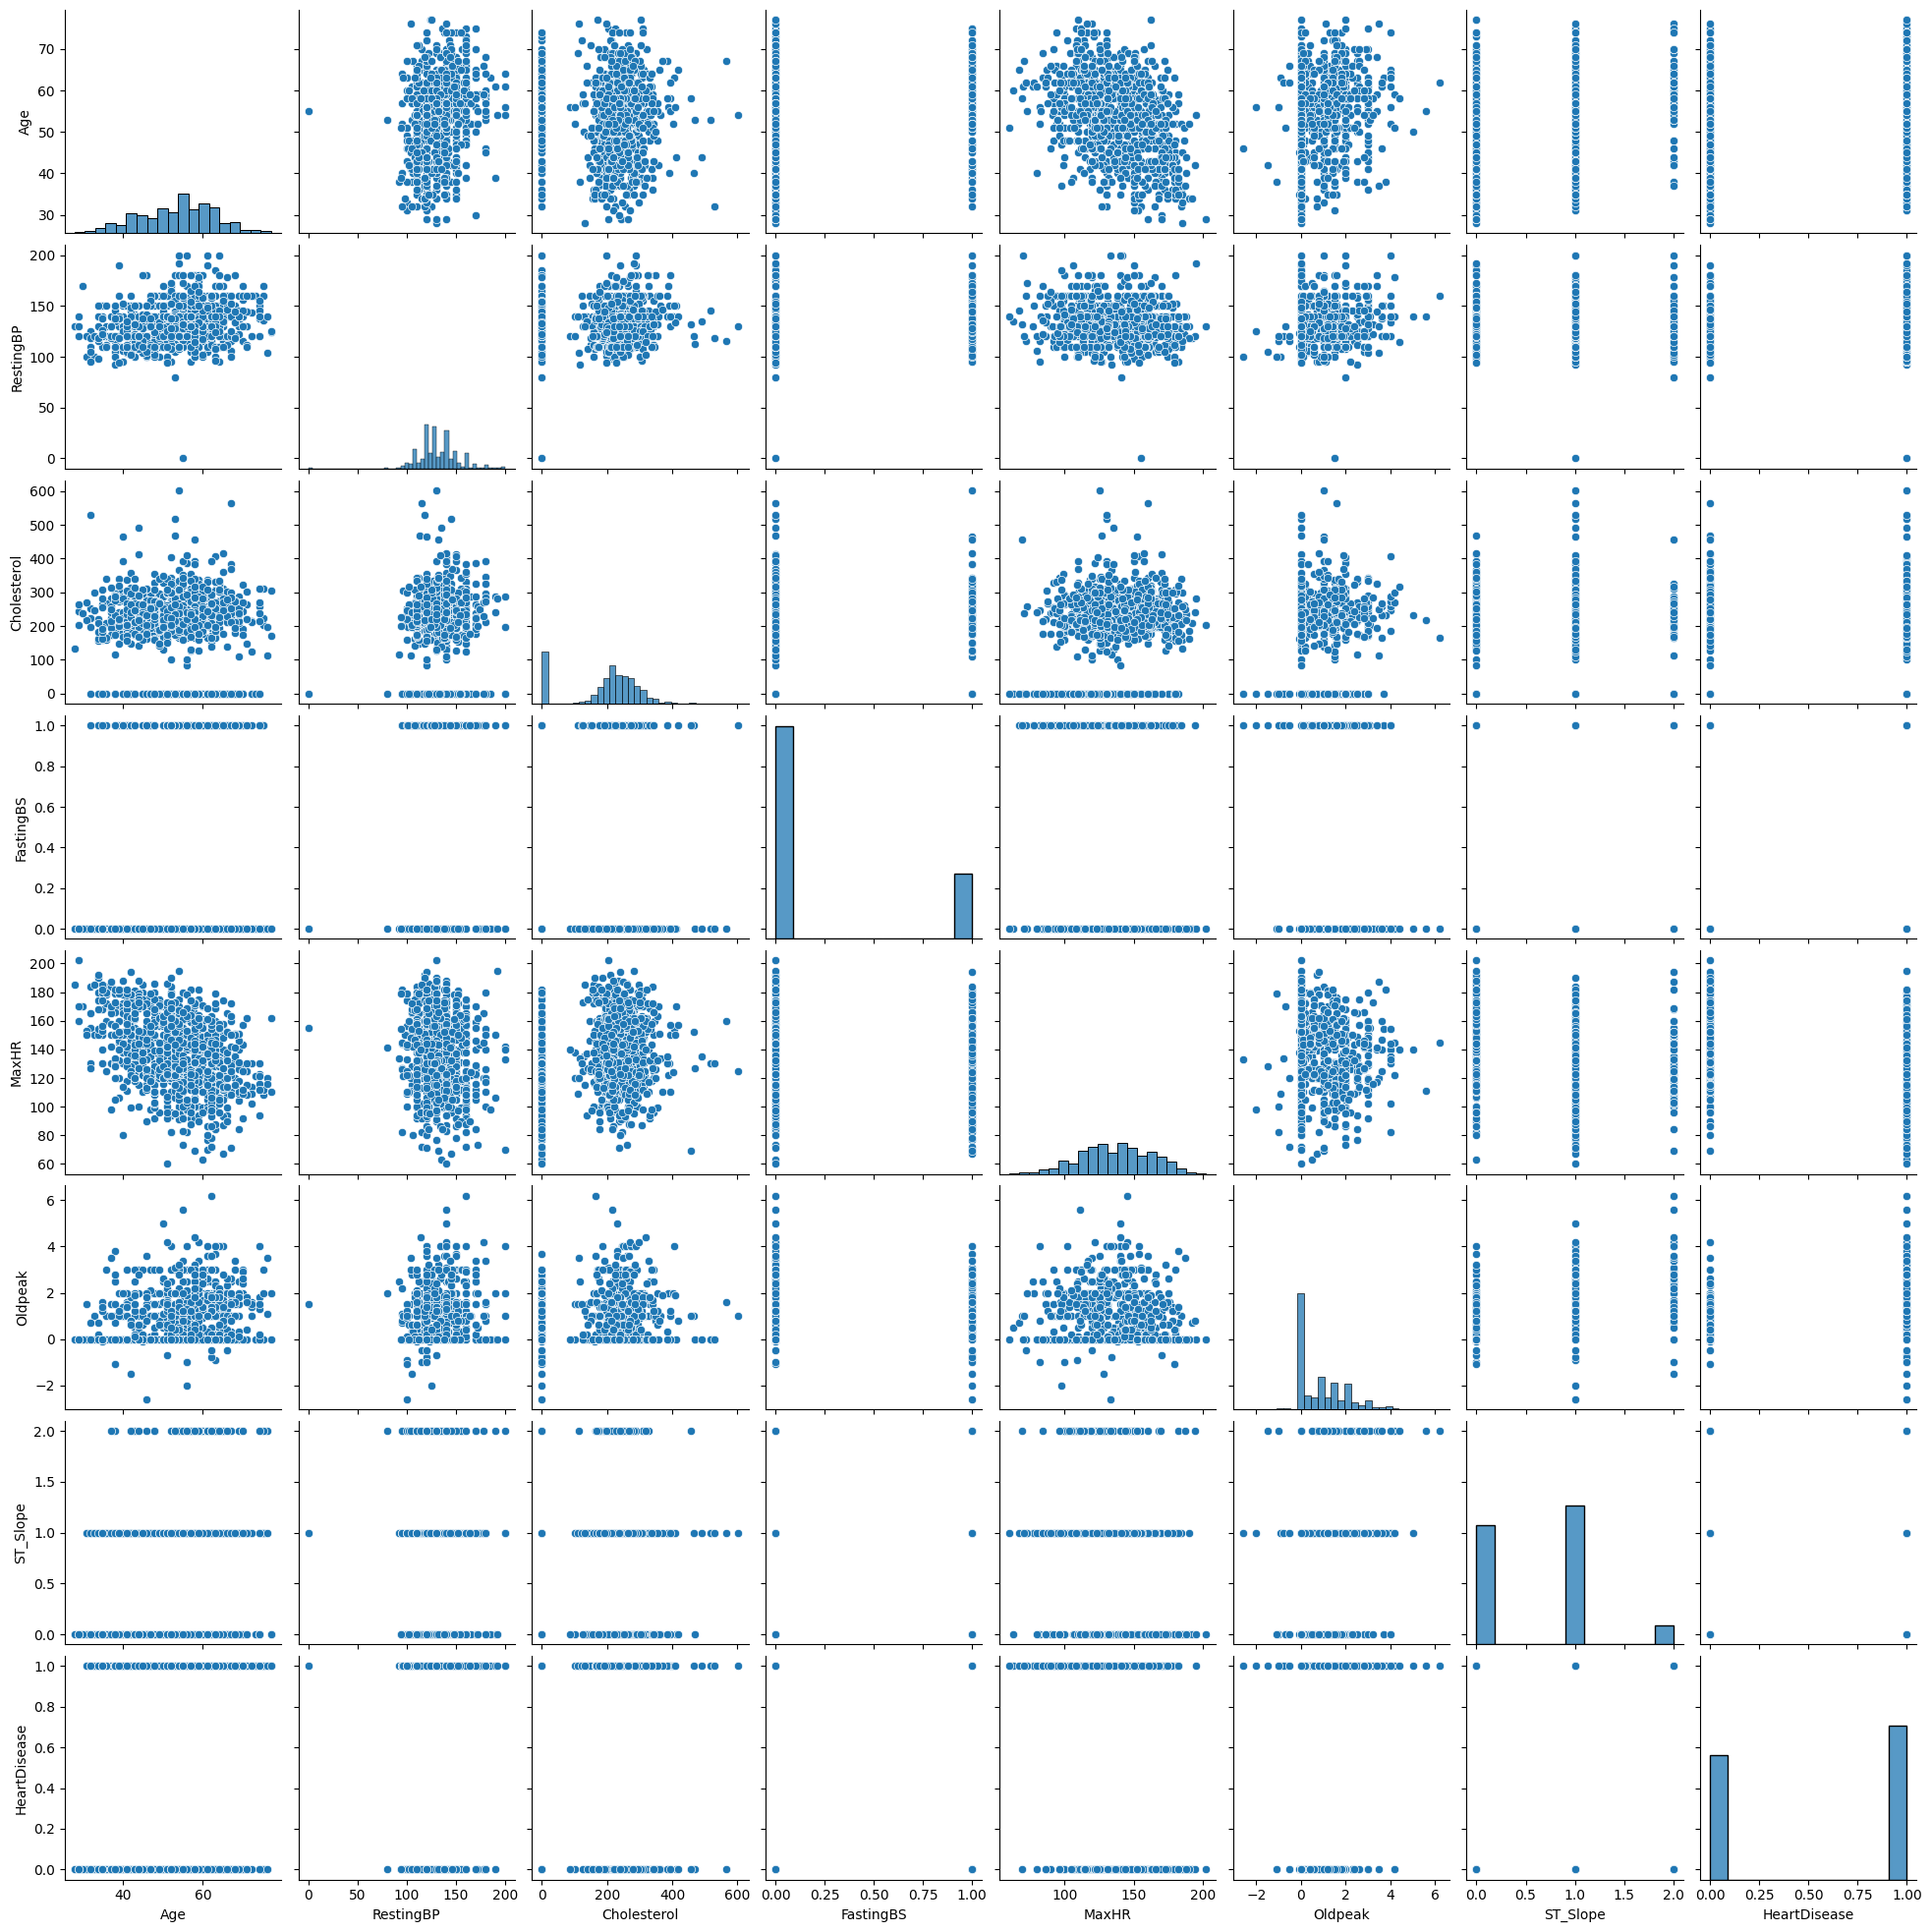

In [13]:
sns.pairplot(Heart_Data)

In [14]:
def EDA_graph(Heart_Data, plot_type='count'):
    for column_name in Heart_Data.columns:
        plt.figure(figsize=(10, 6))  # Set a default figure size for all plots

        if plot_type == 'count':
            sns.countplot(x=Heart_Data[column_name])
            plt.title(f'Count Plot for {column_name}')
        elif plot_type == 'bar':
            sns.barplot(x=Heart_Data[column_name].value_counts().index,
                        y=Heart_Data[column_name].value_counts().values)
            plt.title(f'Bar Plot for {column_name}')
        elif plot_type == 'kde':
            sns.kdeplot(Heart_Data[column_name], fill=True)
            plt.title(f'KDE Plot for {column_name}')
        elif plot_type == 'pie':
            Heart_Data[column_name].value_counts().plot.pie(autopct='%1.1f%%')
            plt.title(f'Pie Chart for {column_name}')
            plt.ylabel('')  # Remove y-label for pie chart
        else:
            print(f"Plot type '{plot_type}' is not recognized. Skipping column {column_name}.")

        plt.show()


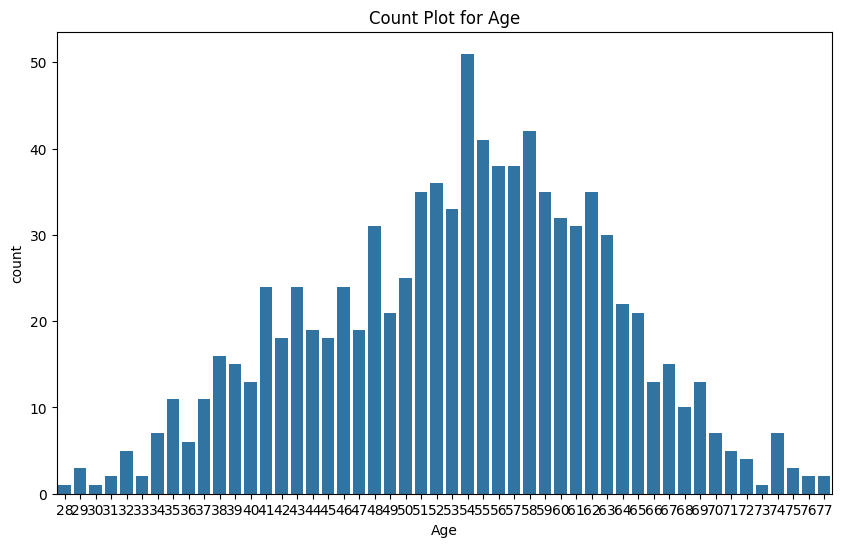

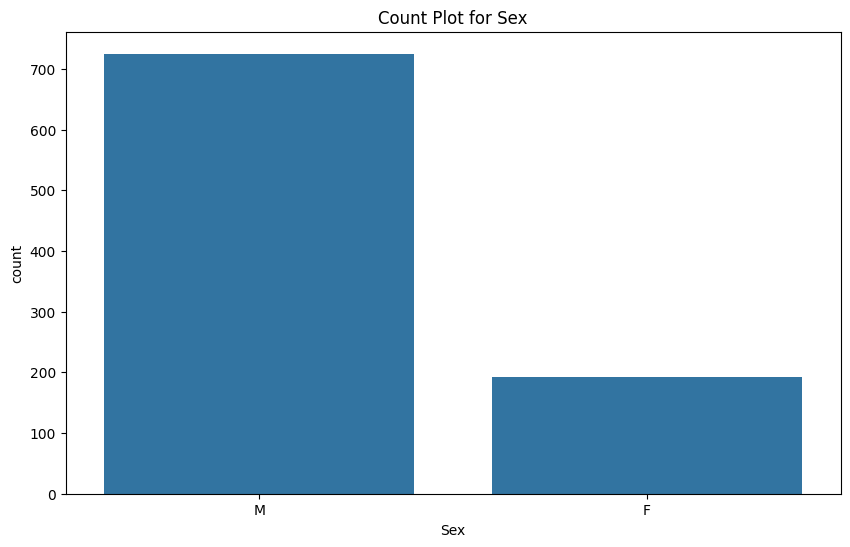

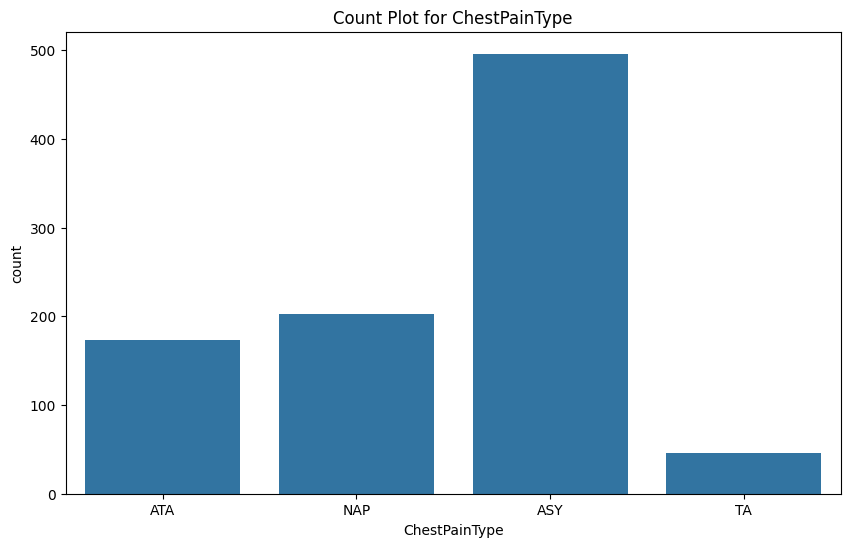

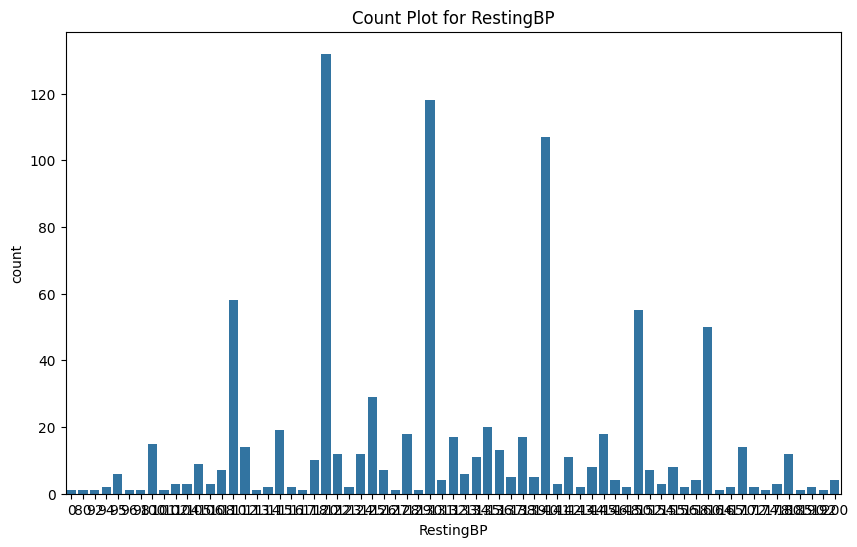

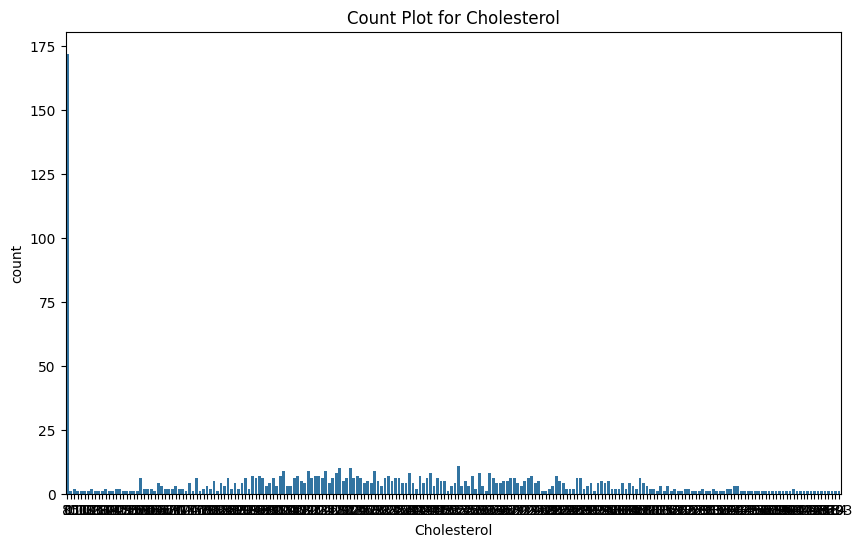

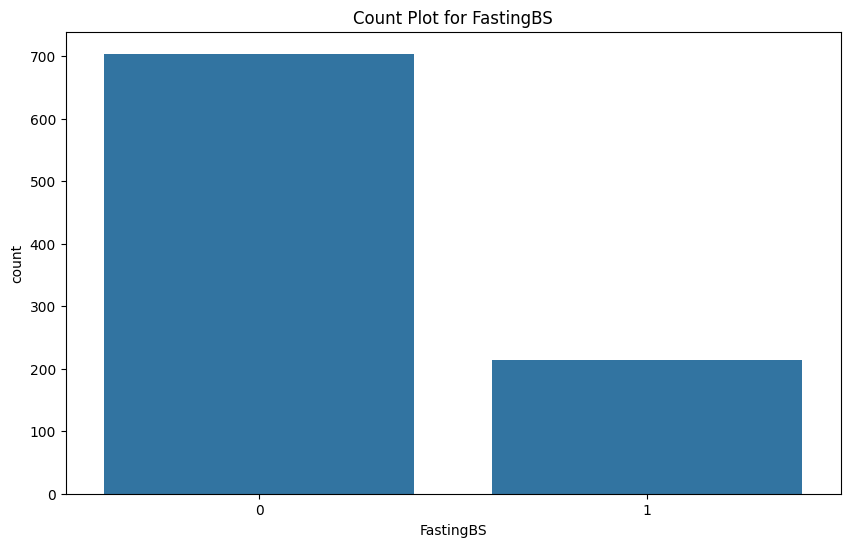

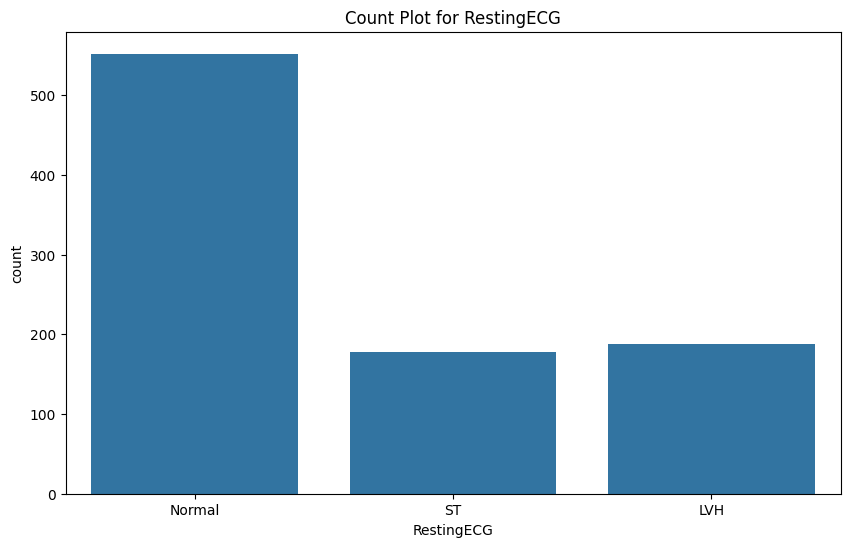

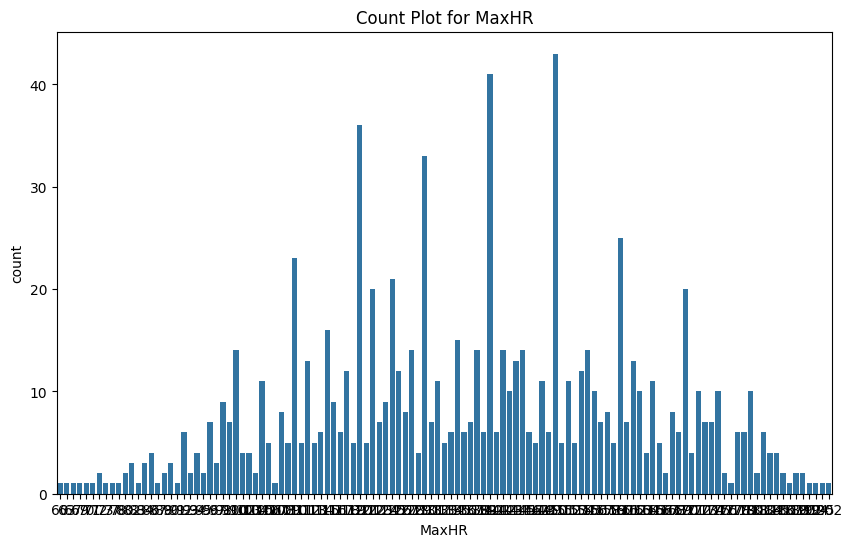

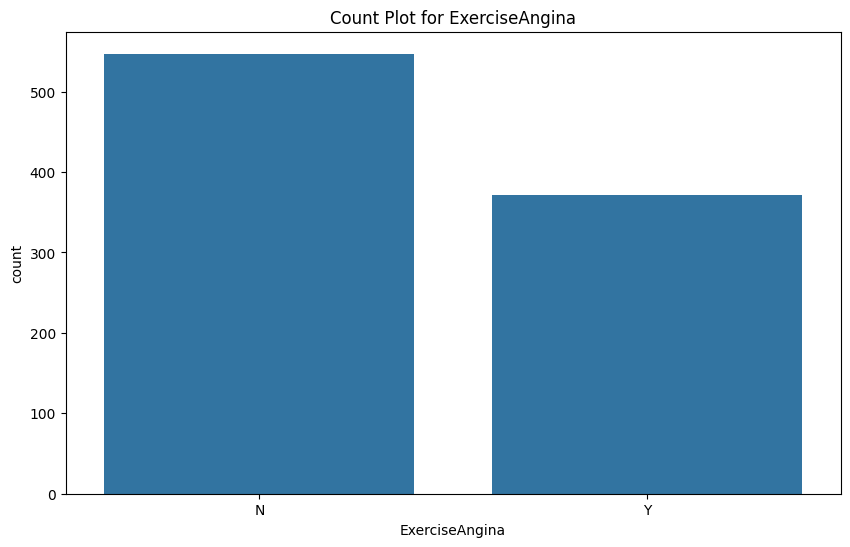

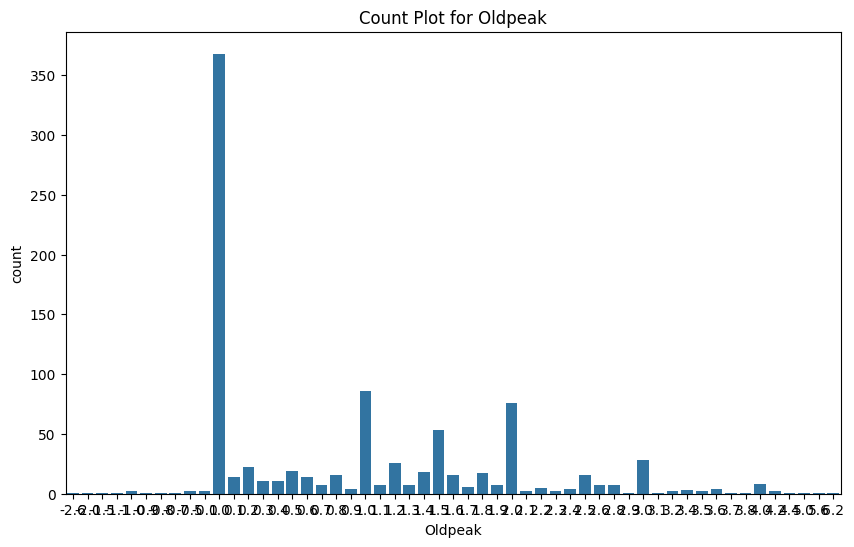

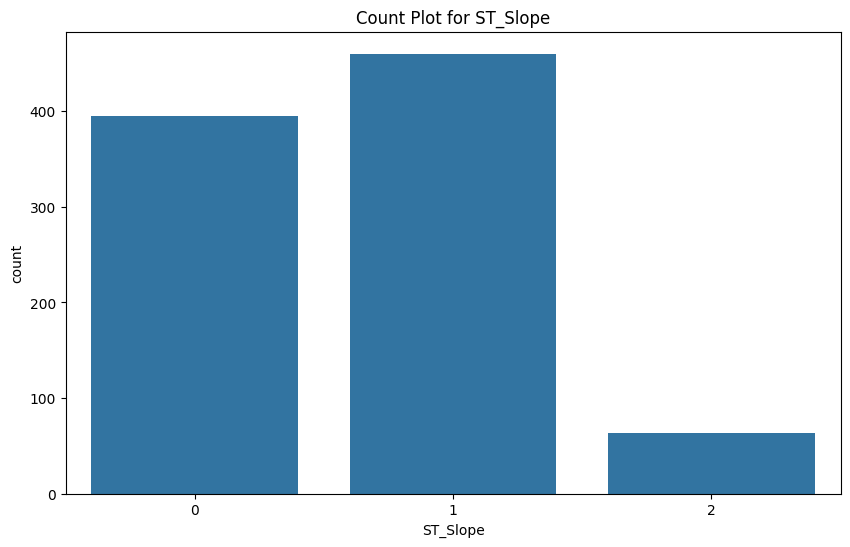

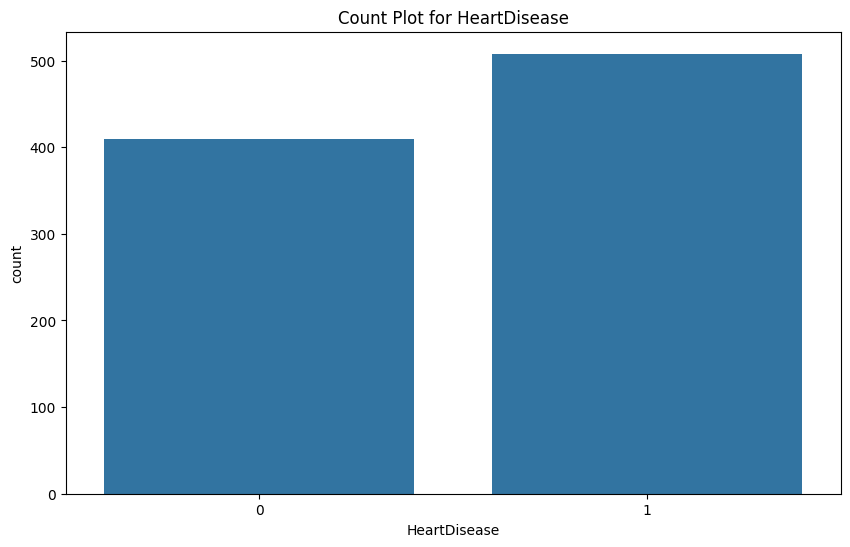

In [15]:
EDA_graph(Heart_Data, plot_type='count')

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(Heart_Data.drop('HeartDisease',axis=1),Heart_Data['HeartDisease'],test_size=0.2,random_state=42)

In [17]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,M,NAP,120,240,1,Normal,194,N,0.8,2
25,36,M,NAP,130,209,0,Normal,178,N,0.0,0
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,0
344,51,M,ASY,120,0,1,Normal,104,N,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,48,F,ASY,120,254,0,ST,110,N,0.0,0
270,45,M,ASY,120,225,0,Normal,140,N,0.0,0
860,60,M,ASY,130,253,0,Normal,144,Y,1.4,0
435,60,M,ASY,152,0,0,ST,118,Y,0.0,0


In [18]:
X_train['Sex'].unique()

array(['M', 'F'], dtype=object)

In [19]:
#X_train['ST_Slope'].replace('Down', 'correct_value', inplace=True)



In [20]:
#X_train.iloc[:, 10]


In [21]:
#X_train['ST_Slope'].value_counts()

In [22]:
X_train_Sex_ChestPainType_RestingECG_ExerciseAngina = ColumnTransformer([('ohe_Sex',OneHotEncoder(handle_unknown='ignore'),[1]),
                                                                                               ('ohe_chestPainType',OneHotEncoder(handle_unknown='ignore'),[2]),
                                                                                               ('ohe_RestingECG',OneHotEncoder(handle_unknown='ignore'),[6]),
                                                                                               ('ohe_ExerciseAngina',OneHotEncoder(handle_unknown='ignore'),[8])],
                                                                                 remainder='passthrough'
                                                                                 )

In [23]:
X_train_Sex_ChestPainType_RestingECG_ExerciseAngina

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_Sex',
                                 OneHotEncoder(handle_unknown='ignore'), [1]),
                                ('ohe_chestPainType',
                                 OneHotEncoder(handle_unknown='ignore'), [2]),
                                ('ohe_RestingECG',
                                 OneHotEncoder(handle_unknown='ignore'), [6]),
                                ('ohe_ExerciseAngina',
                                 OneHotEncoder(handle_unknown='ignore'), [8])])

In [24]:
 #X_train_ST_Slope = ColumnTransformer([('oe_ST_Slope',OrdinalEncoder(categories=[['Up','Flat','Down']],handle_unknown='use_encoded_value',unknown_value=-1),[10])],
                                     # remainder = 'passthrough')

In [25]:
#X_train_ST_Slope= ColumnTransformer([('oe_Cough_symptoms',OrdinalEncoder(categories=[['Up','Flat','correct_value']],handle_unknown='use_encoded_value',unknown_value=-1),[10])
                                   # ],remainder='passthrough')

In [26]:
#X_train_transformed = X_train_ST_Slope.fit_transform(X_train)
#print(X_train_transformed[:5])


In [27]:
Decision_Tree = DecisionTreeClassifier()

In [28]:
pipe = make_pipeline(X_train_Sex_ChestPainType_RestingECG_ExerciseAngina,Decision_Tree)

In [29]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Sex',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1]),
                                                 ('ohe_chestPainType',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2]),
                                                 ('ohe_RestingECG',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [6]),
                                                 ('ohe_ExerciseAngina',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [8])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [30]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Sex',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1]),
                                                 ('ohe_chestPainType',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2]),
                                                 ('ohe_RestingECG',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [6]),
                                                 ('ohe_ExerciseAngina',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [8])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 795 to 102
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 68.8+ KB


In [32]:
Y_predict = pipe.predict(X_test)

In [33]:
accuracy = accuracy_score(Y_test,Y_predict)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.80


In [34]:
trf3 = ColumnTransformer([('scale',MinMaxScaler(),slice(0,10))])

In [35]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [36]:
#model = LogisticRegression()
#trf4 = model.fit(X_train, Y_train)

In [37]:
# = make_pipeline(X_train_Sex_ChestPainType_RestingECG_ExerciseAngina,X_train_ST_Slope,trf3)

In [38]:
lr = LogisticRegression()


In [39]:
pipe1 = make_pipeline(X_train_Sex_ChestPainType_RestingECG_ExerciseAngina,lr)

In [40]:
pipe1.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Sex',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [1]),
                                                 ('ohe_chestPainType',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [2]),
                                                 ('ohe_RestingECG',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [6]),
                                                 ('ohe_ExerciseAngina',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [8])])),
                ('logisticregression', LogisticRegression())])

In [41]:
pred = pipe1.predict(X_test)

In [42]:
accuracy = accuracy_score(Y_test,pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.85


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier()

In [45]:
pipe2 = make_pipeline(X_train_Sex_ChestPainType_RestingECG_ExerciseAngina,rfc)

In [46]:
pred1 = pipe2.fit(X_train,Y_train).predict(X_test)

In [47]:
accuracy = accuracy_score(Y_test,pred1)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.86
